In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [3]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
df.nunique().sort_values(ascending=True)

,0
hypertension,2
heart_disease,2
ever_married,2
Residence_type,2
stroke,2
gender,3
smoking_status,4
work_type,5
age,106
bmi,407


In [7]:
df.stroke.unique()

array([0, 1])

In [8]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [9]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

id                  0.00 %
gender              0.00 %
age                 0.00 %
hypertension        0.00 %
heart_disease       0.00 %
ever_married        0.00 %
work_type           0.00 %
Residence_type      0.00 %
avg_glucose_level   0.00 %
bmi                 0.00 %
smoking_status      0.00 %
stroke              0.00 %
dtype: float64


In [16]:
import missingno as msno

<Axes: >

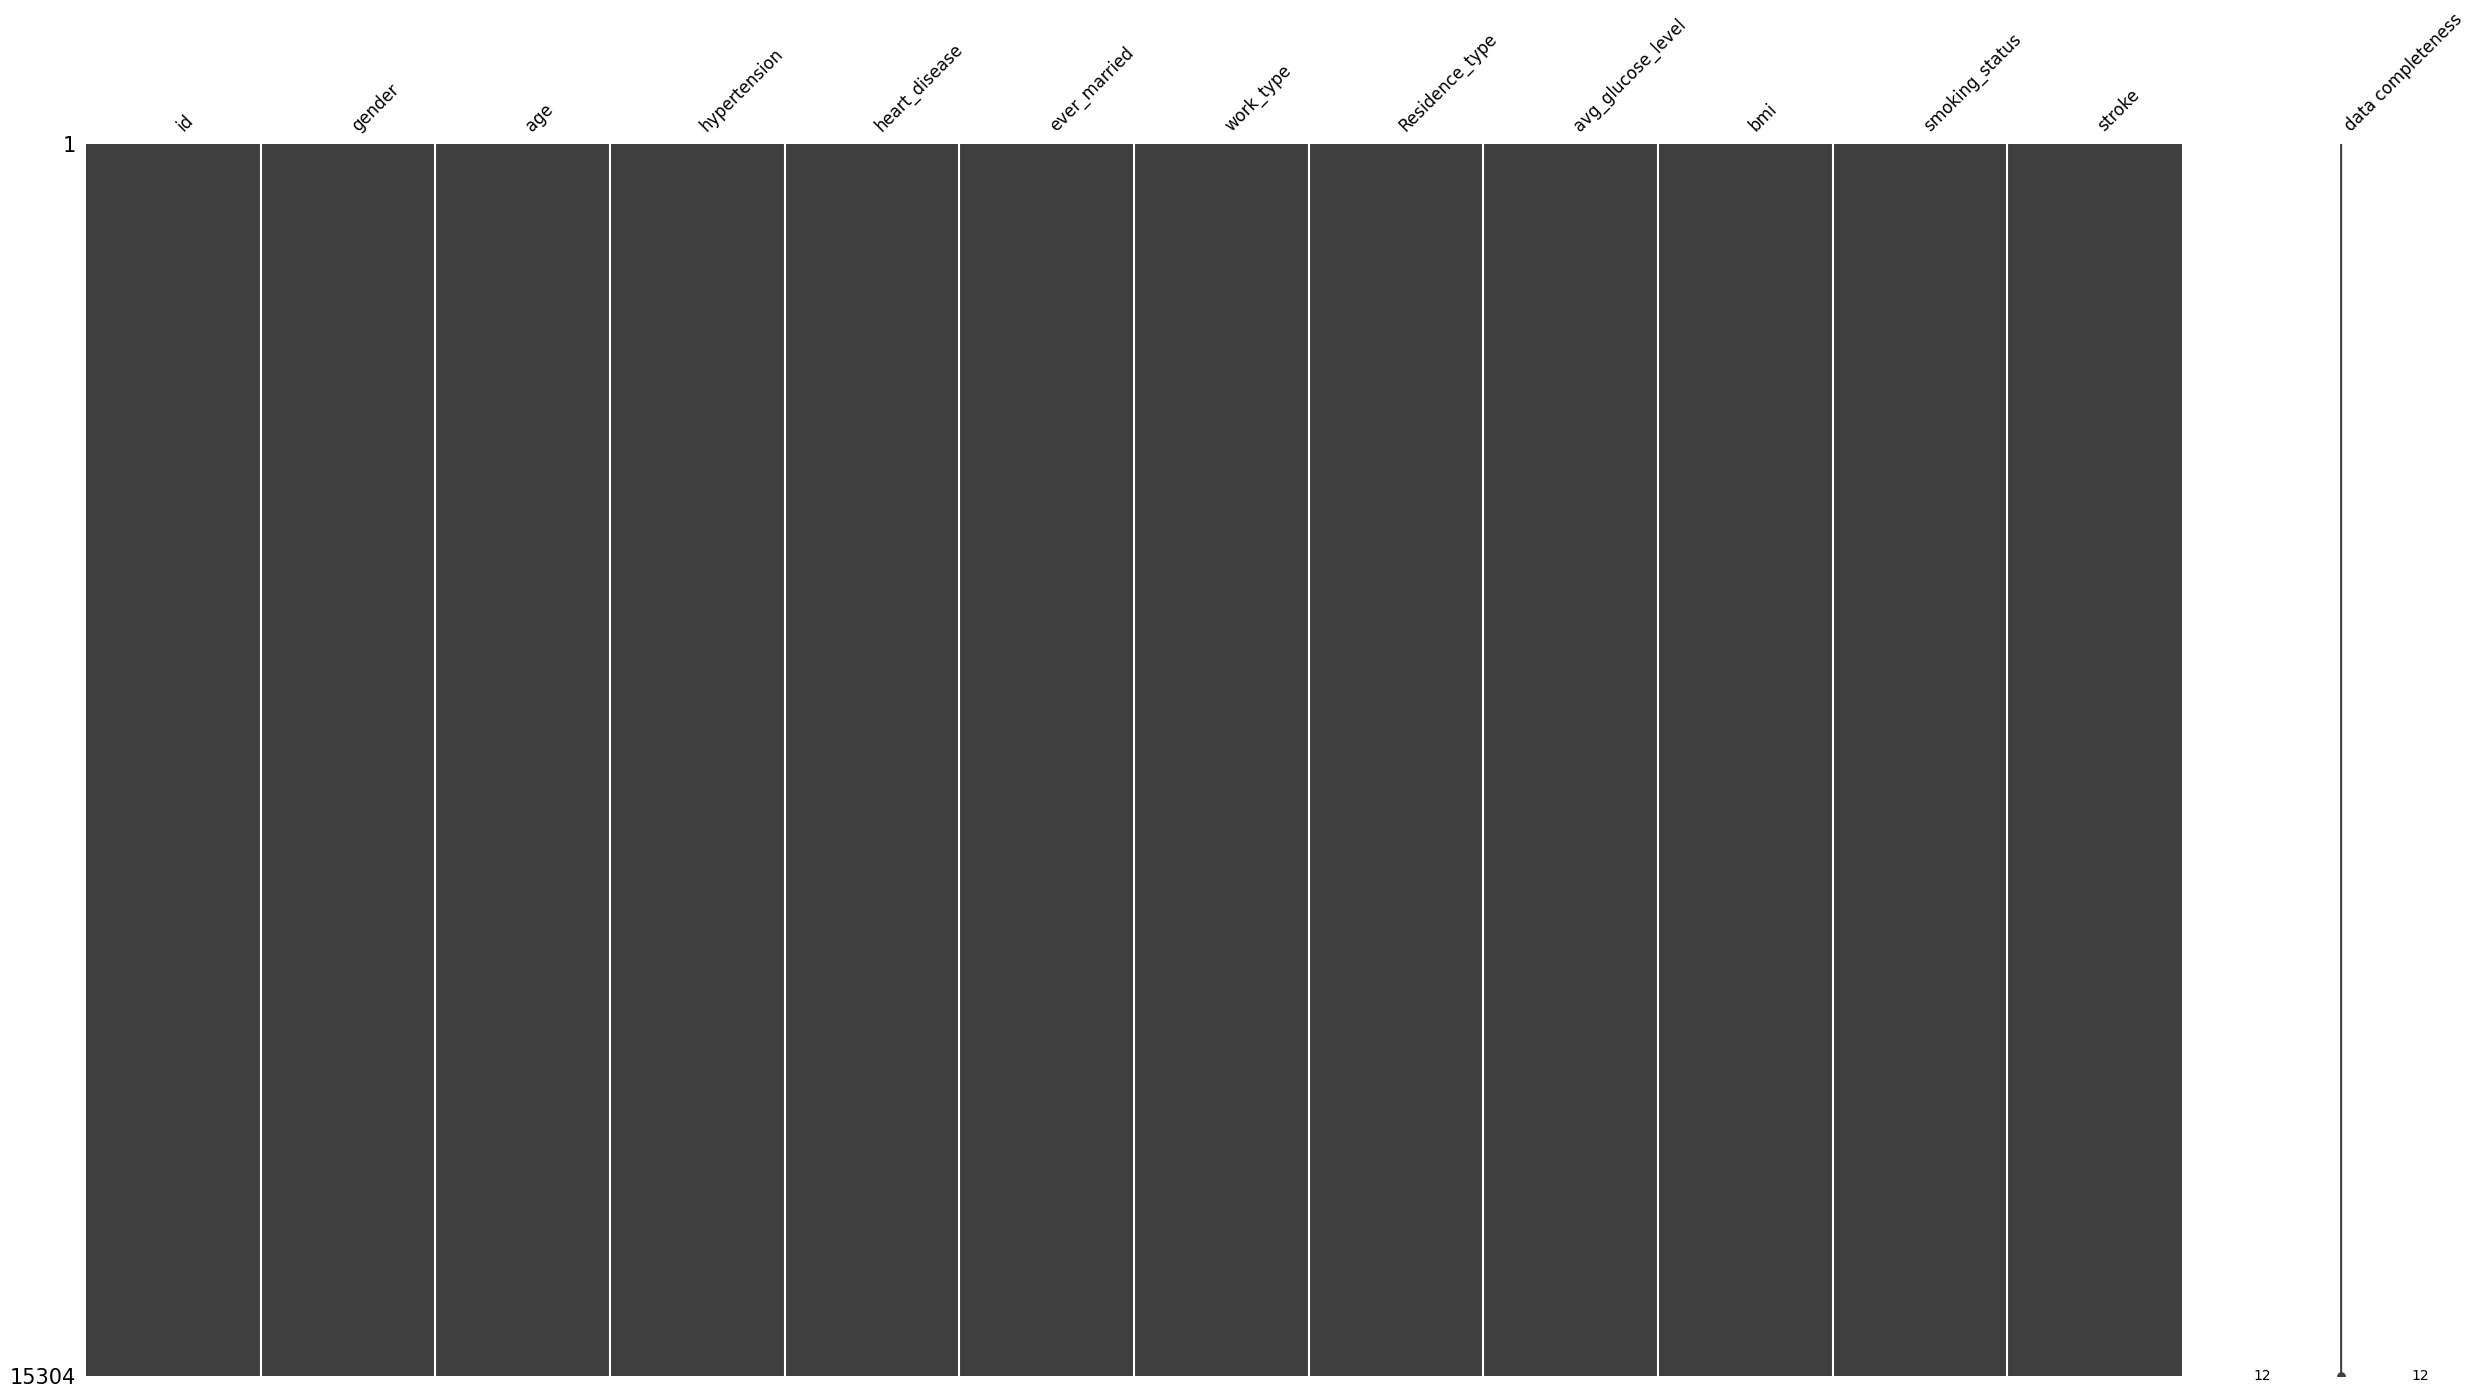

In [17]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

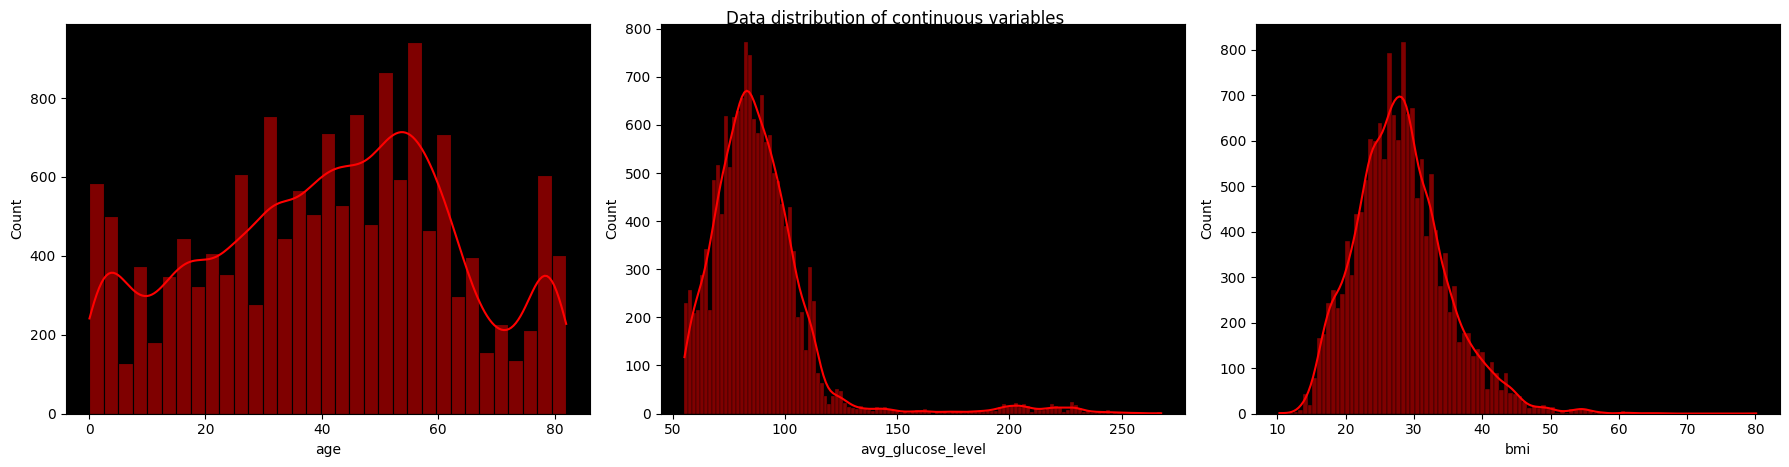

In [18]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

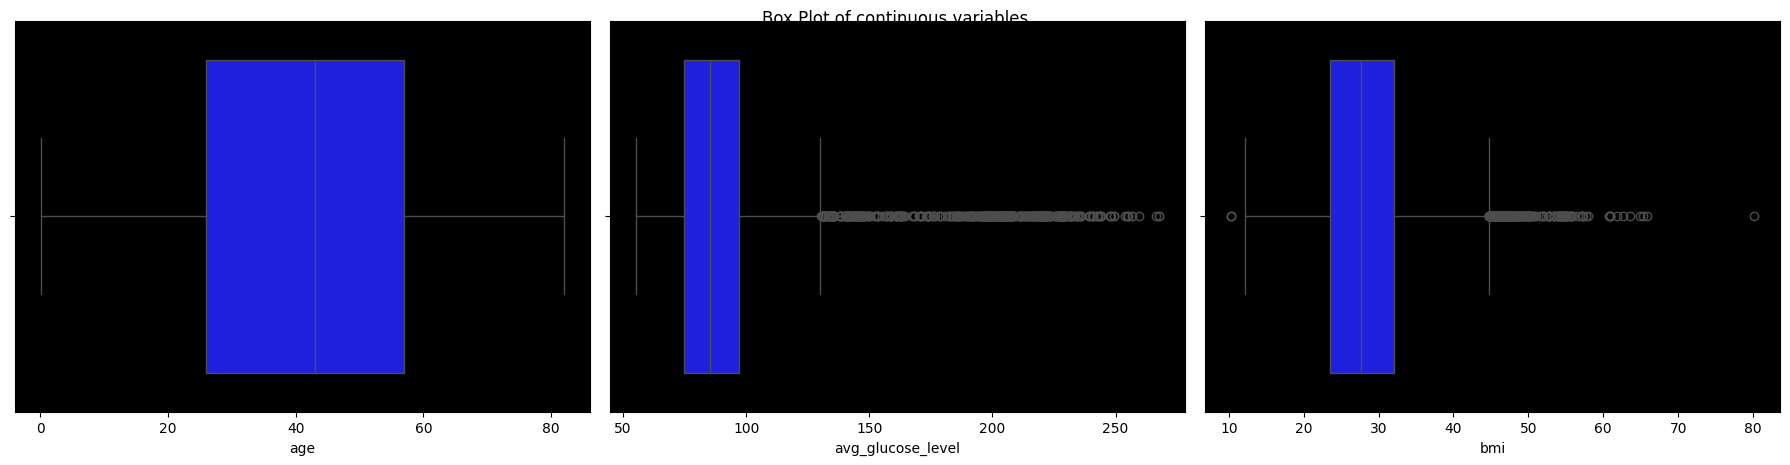

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [20]:
#This function will replace the outliers with the median from the dataset
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [21]:
#selecting variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

In [22]:
df=outlier_treating(df,var)

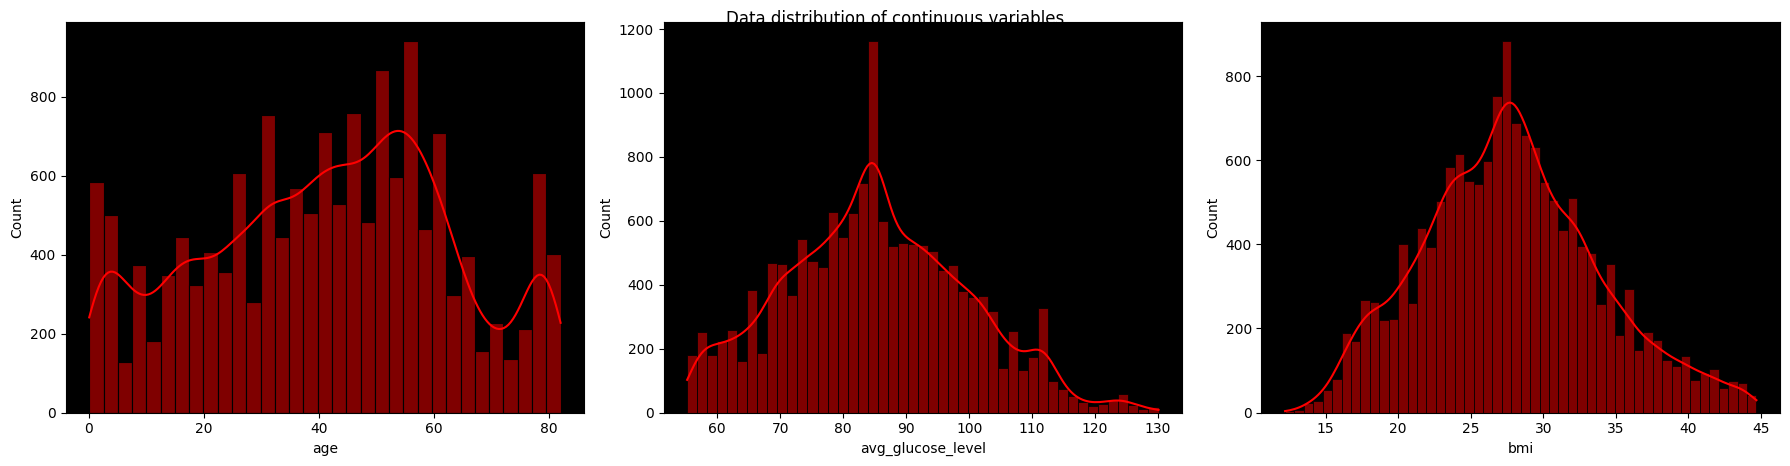

In [23]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

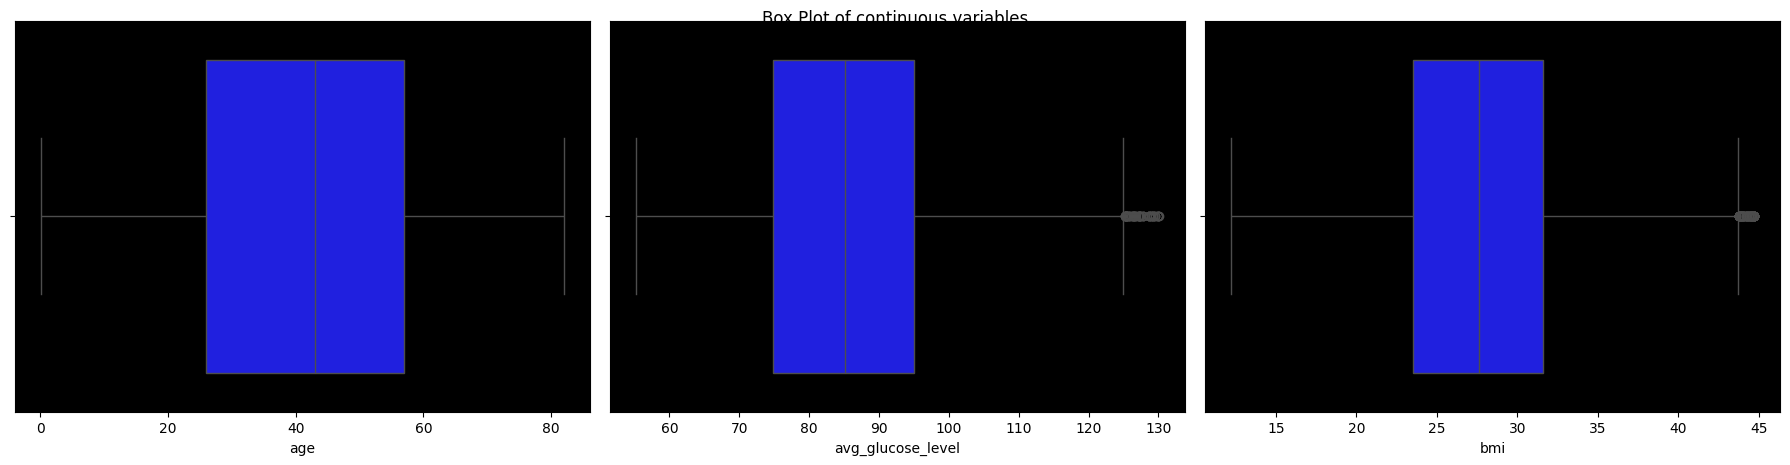

In [24]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

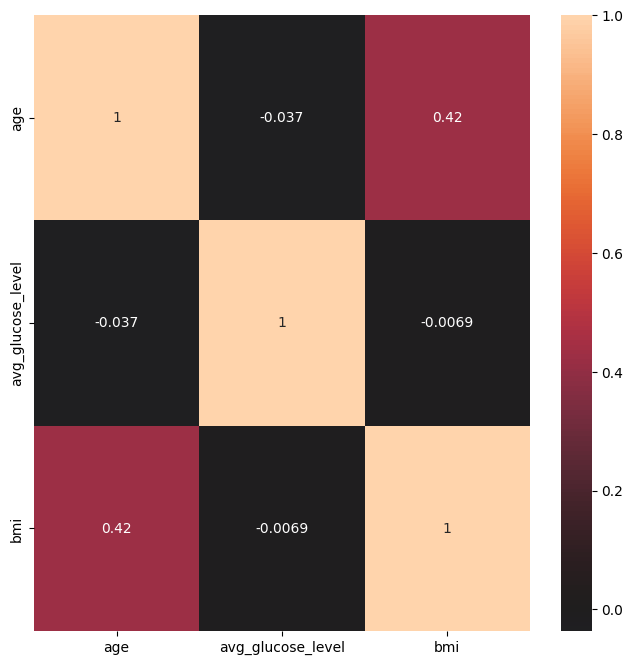

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

<ipython-input-26-93de774aaaae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='stroke', y=col, ax=ax,edgecolor="black",palette='viridis_r')
<ipython-input-26-93de774aaaae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='stroke', y=col, ax=ax,edgecolor="black",palette='viridis_r')
<ipython-input-26-93de774aaaae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='stroke', y=col, ax=ax,edgecolor="black",palette='viridis_r')


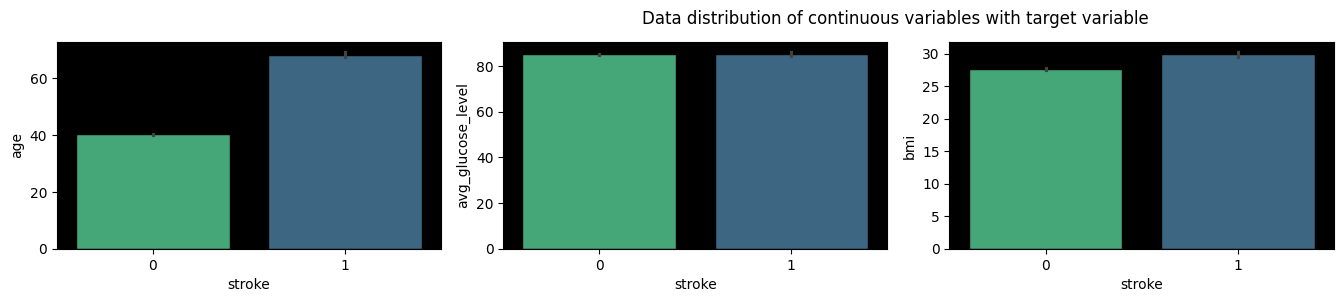

In [26]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=df,x='stroke', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables with target variable')
plt.tight_layout()

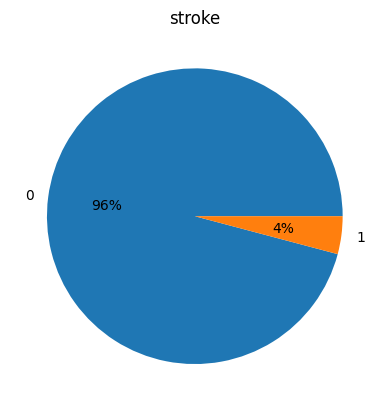

In [27]:
target_var=pd.crosstab(index=df['stroke'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('stroke')
plt.show()

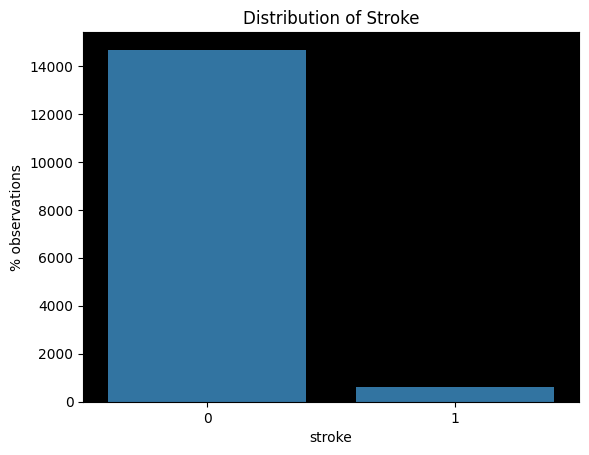

In [28]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('Distribution of Stroke')
plt.show()

In [29]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [31]:
X=pd.get_dummies(X,drop_first=False)

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA

In [33]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [34]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

age : 46.00%
hypertension : 13.65%
heart_disease : 7.90%
avg_glucose_level : 0.00%
bmi : 3.39%
gender_Female : 0.14%
gender_Male : 0.14%
gender_Other : 0.00%
ever_married_No : 8.27%
ever_married_Yes : 8.27%
work_type_Govt_job : 0.02%
work_type_Never_worked : 0.07%
work_type_Private : 0.00%
work_type_Self-employed : 3.74%
work_type_children : 4.08%
Residence_type_Rural : 0.00%
Residence_type_Urban : 0.00%
smoking_status_Unknown : 2.06%
smoking_status_formerly smoked : 2.05%
smoking_status_never smoked : 0.00%
smoking_status_smokes : 0.21%


<ipython-input-35-cfbf032def84>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


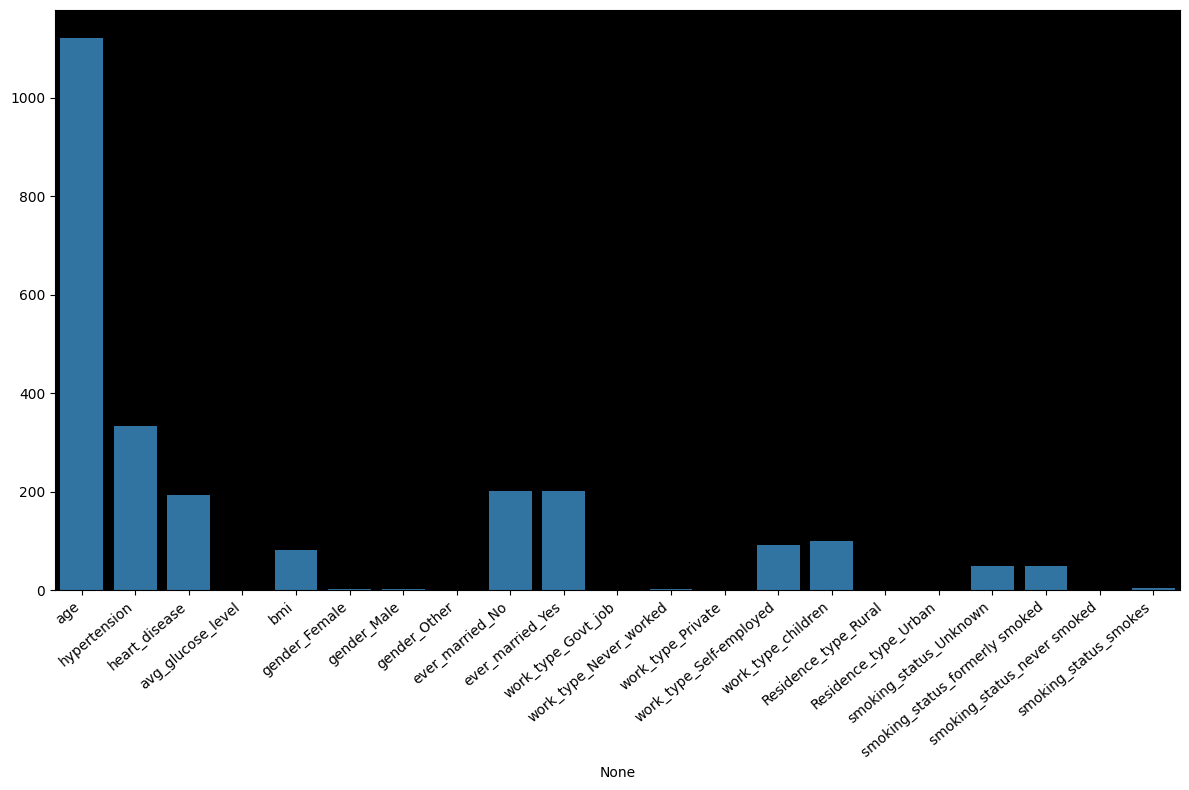

In [35]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,8))
ax=sns.barplot(x=X.columns,y=fs.scores_)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [36]:
X1=X[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,stratify=y,random_state=32)

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=2,k_neighbors=3,sampling_strategy='minority')

In [41]:
X_train,y_train=sm.fit_resample(X_train,y_train)

In [42]:
sns.countplot(y_train)
plt.show()

KeyboardInterrupt: 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [45]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the hyperparameters grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization
    'C': [0.1, 1, 10, 100],                     # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Solvers compatible with l1 and elasticnet
    'max_iter': [100, 200, 500]                 # Maximum number of iterations
}

# Initialize the classifier
classifier = LogisticRegression(random_state=0)

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred_tuned = best_classifier.predict(X_test)

# Evaluate the tuned model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model Accuracy (Tuned): {accuracy_score(y_pred_tuned, y_test) * 100:.2f}%")
print(f"Model F1-Score (Tuned): {f1_score(y_pred_tuned, y_test, average='weighted') * 100:.2f}%")

# Cross-validation
accuracies_tuned = cross_val_score(estimator=best_classifier, X=X_train, y=y_train, cv=5)
print("Cross Val Accuracy (Tuned): {:.2f} %".format(accuracies_tuned.mean() * 100))
print("Cross Val Standard Deviation (Tuned): {:.2f} %".format(accuracies_tuned.std() * 100))

# Print classification report
print(classification_report(y_pred_tuned, y_test, zero_division=1))


Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}
Model Accuracy (Tuned): 77.37%
Model F1-Score (Tuned): 70.63%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Cross Val Accuracy (Tuned): 78.21 %
Cross Val Standard Deviation (Tuned): 0.26 %
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2864
           1       0.80      0.13      0.23       962

    accuracy                           0.77      3826
   macro avg       0.79      0.56      0.55      3826
weighted avg       0.78      0.77      0.71      3826



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


### KNN <a class="anchor" id="sec6.2"></a>

In [50]:
classifier=classifier =KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 93.75%
Model F1-Score : 93.86%
Cross Val Accuracy: 68.06 %
Cross Val Standard Deviation: 3.02 %
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3679
           1       0.21      0.22      0.22       147

    accuracy                           0.94      3826
   macro avg       0.59      0.60      0.59      3826
weighted avg       0.94      0.94      0.94      3826



### Naive Bayes <a class="anchor" id="sec6.3"></a>

In [51]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 52.74%
Model F1-Score : 40.30%
Cross Val Accuracy: 72.93 %
Cross Val Standard Deviation: 0.26 %
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1876
           1       0.95      0.08      0.14      1950

    accuracy                           0.53      3826
   macro avg       0.73      0.54      0.41      3826
weighted avg       0.73      0.53      0.40      3826



### Support Vector Classifier <a class="anchor" id="sec6.4"></a>

In [ ]:
classifier=SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 73.65%
Model F1-Score : 65.73%
Cross Val Accuracy: 79.90 %
Cross Val Standard Deviation: 0.29 %
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      2712
           1       0.84      0.12      0.21      1114

    accuracy                           0.74      3826
   macro avg       0.78      0.55      0.52      3826
weighted avg       0.76      0.74      0.66      3826



### Random Forest <a class="anchor" id="sec6.5"></a>

In [ ]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 80.45%
Model F1-Score : 74.87%
Cross Val Accuracy: 87.11 %
Cross Val Standard Deviation: 0.78 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3046
           1       0.60      0.12      0.20       780

    accuracy                           0.80      3826
   macro avg       0.71      0.55      0.55      3826
weighted avg       0.77      0.80      0.75      3826



### Xg Boost <a class="anchor" id="sec6.6"></a>

In [ ]:
classifier = XGBClassifier(objective= 'binary:logistic')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 78.25%
Model F1-Score : 71.84%
Cross Val Accuracy: 85.50 %
Cross Val Standard Deviation: 0.59 %
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2920
           1       0.73      0.13      0.22       906

    accuracy                           0.78      3826
   macro avg       0.76      0.56      0.55      3826
weighted avg       0.77      0.78      0.72      3826



### Stacking Regressor<a class="anchor" id="sec6.6"></a>

In [ ]:
estimators=[('logistic regression',LogisticRegression()),('SVC',SVC(kernel = 'rbf', random_state = 0)),('Decision Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)),('random forest',RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)),('Xgboost',XGBClassifier())]

In [ ]:
from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Stacking Regressor']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 78.25%
Model F1-Score : 71.84%
Cross Val Accuracy: 85.50 %
Cross Val Standard Deviation: 0.59 %
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2920
           1       0.73      0.13      0.22       906

    accuracy                           0.78      3826
   macro avg       0.76      0.56      0.55      3826
weighted avg       0.77      0.78      0.72      3826



### Model Comparison <a class="anchor" id="sec7"></a>

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,93.86%,68.06%,3.02%
Decision Tree,80.61%,75.09%,87.20%,0.80%
Random Forest,80.45%,74.87%,87.11%,0.78%
Xg Boost,78.25%,71.84%,85.50%,0.59%
Stacking Regressor,78.25%,71.84%,85.50%,0.59%
Logistic Regression,77.37%,70.63%,78.21%,0.26%
Support Vector Classifier,73.65%,65.73%,79.90%,0.29%
Naive Bayes,52.74%,40.30%,72.93%,0.26%


#### Maximum Accuracies in each Column <a class="anchor" id="sec7.1"></a>

In [ ]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,93.86%,68.06%,3.02%
Decision Tree,80.61%,75.09%,87.20%,0.80%
Random Forest,80.45%,74.87%,87.11%,0.78%
Xg Boost,78.25%,71.84%,85.50%,0.59%
Stacking Regressor,78.25%,71.84%,85.50%,0.59%
Logistic Regression,77.37%,70.63%,78.21%,0.26%
Support Vector Classifier,73.65%,65.73%,79.90%,0.29%
Naive Bayes,52.74%,40.30%,72.93%,0.26%


#### Minimum Accuracies in each Column <a class="anchor" id="sec7.2"></a>

In [ ]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,93.75%,93.86%,68.06%,3.02%
Decision Tree,80.61%,75.09%,87.20%,0.80%
Random Forest,80.45%,74.87%,87.11%,0.78%
Xg Boost,78.25%,71.84%,85.50%,0.59%
Stacking Regressor,78.25%,71.84%,85.50%,0.59%
Logistic Regression,77.37%,70.63%,78.21%,0.26%
Support Vector Classifier,73.65%,65.73%,79.90%,0.29%
Naive Bayes,52.74%,40.30%,72.93%,0.26%


### Final Model(XgBoost)  for submission <a class="anchor" id="sec8"></a>

In [ ]:
estimator=XGBClassifier(objective= 'binary:logistic')
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X,y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
test=test.iloc[:,1:]
var=list(df.select_dtypes(include=['float64']).columns)
X=outlier_treating(X,var)
test=outlier_treating(test,var)
X=pd.get_dummies(X,drop_first=False)
test=pd.get_dummies(test,drop_first=False)
X=X[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]
test=test[['age','hypertension','heart_disease','ever_married_Yes','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_Unknown']]
sm = SMOTE(random_state=2,k_neighbors=3,sampling_strategy='minority')
X,y=sm.fit_resample(X,y)
sc=StandardScaler()
X=sc.fit_transform(X)
test=sc.transform(test)
classifier=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
classifier.fit(X,y)
y_pred=classifier.predict_proba(test)
sub['stroke']=y_pred[:,1]
sub.to_csv('file.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:54] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
